In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

In [2]:
# Load demographics data
demographics_file = r"D:\ABADS\Project\Dataset_Retail\demographics.xlsx"
df1 = pd.read_excel(demographics_file)
df1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,SP
...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,SP
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,IND


In [3]:
# Load behaviour data
behaviour_file = r"D:\ABADS\Project\Dataset_Retail\behaviour.json"
with open(behaviour_file, 'r') as f:
    df2 = json.load(f)

In [4]:
# Convert behaviour JSON to DataFrame
behaviour_list = []
for record in df2:
    for key, value in record.items():
        value['ID'] = key.replace('ID_', '')  # Extract numeric ID
        behaviour_list.append(value)
df2 = pd.DataFrame(behaviour_list)
df2

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,ID
0,0,189,104,379,111,189,218,1,4,4,6,1,1826
1,0,464,5,64,7,0,37,1,7,3,7,5,1
2,0,134,11,59,15,2,30,1,3,2,5,2,10476
3,0,10,0,1,0,0,0,1,1,0,2,7,1386
4,0,6,16,24,11,0,34,2,3,1,2,7,5371
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,99,372,18,126,47,48,78,2,5,2,11,4,10142
2236,99,5,10,13,3,8,16,1,1,0,3,8,5263
2237,99,185,2,88,15,5,14,2,6,1,5,8,22
2238,99,267,38,701,149,165,63,1,5,4,10,3,528


In [5]:
# Load campaign data
campaign_file = r"D:\ABADS\Project\Dataset_Retail\campaign.json"
with open(campaign_file, 'r') as f:
    df3 = json.load(f)

In [6]:
# Convert campaign JSON to DataFrame
campaign_list = []
for record in df3:
    for key, value in record.items():
        value['ID'] = key.replace('ID_', '')  # Extract numeric ID
        campaign_list.append(value)

df3 = pd.DataFrame(campaign_list)
df3

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,ID
0,0,0,0,0,0,1,0,1826
1,0,1,0,0,0,1,0,1
2,0,0,0,0,0,0,0,10476
3,0,0,0,0,0,0,0,1386
4,0,0,1,0,0,1,0,5371
...,...,...,...,...,...,...,...,...
2235,0,0,0,0,0,0,0,10142
2236,0,0,0,0,0,0,0,5263
2237,0,0,0,0,0,0,0,22
2238,0,0,0,0,0,0,0,528


In [7]:
# Convert ID column to numeric
df1['ID'] = pd.to_numeric(df1['ID'])
df2['ID'] = pd.to_numeric(df2['ID'])
df3['ID'] = pd.to_numeric(df3['ID'])

In [8]:
# Merge all three datasets on ID
merged_df = df1.merge(df2, on='ID', how='inner')
merged_df = merged_df.merge(df3, on='ID', how='inner')
merged_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,SP,0,...,4,6,1,0,0,0,0,0,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,CA,0,...,3,7,5,0,1,0,0,0,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,US,0,...,2,5,2,0,0,0,0,0,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,AUS,0,...,0,2,7,0,0,0,0,0,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,SP,0,...,1,2,7,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,US,99,...,2,11,4,0,0,0,0,0,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,SP,99,...,0,3,8,0,0,0,0,0,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,SP,99,...,1,5,8,0,0,0,0,0,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,IND,99,...,4,10,3,0,0,0,0,0,0,0


In [9]:
# Data Cleaning: Fix column naming inconsistencies
merged_df.rename(columns={'MntGoldProds': 'MntGoldProducts'}, inplace=True)
merged_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,SP,0,...,4,6,1,0,0,0,0,0,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,CA,0,...,3,7,5,0,1,0,0,0,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,US,0,...,2,5,2,0,0,0,0,0,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,AUS,0,...,0,2,7,0,0,0,0,0,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,SP,0,...,1,2,7,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,US,99,...,2,11,4,0,0,0,0,0,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,SP,99,...,0,3,8,0,0,0,0,0,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,SP,99,...,1,5,8,0,0,0,0,0,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,IND,99,...,4,10,3,0,0,0,0,0,0,0


In [10]:
# Handle Missing Values
for col in merged_df.columns:
    if merged_df[col].dtype == 'object':  # Categorical columns
        merged_df[col].fillna(merged_df[col].mode()[0], inplace=True)
    else:  # Numeric columns
        merged_df[col].fillna(merged_df[col].median(), inplace=True)

merged_df

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_11480\2056088237.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[col].fillna(merged_df[col].median(), inplace=True)
C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_11480\2056088237.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,SP,0,...,4,6,1,0,0,0,0,0,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,CA,0,...,3,7,5,0,1,0,0,0,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,US,0,...,2,5,2,0,0,0,0,0,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,AUS,0,...,0,2,7,0,0,0,0,0,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,SP,0,...,1,2,7,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,US,99,...,2,11,4,0,0,0,0,0,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,SP,99,...,0,3,8,0,0,0,0,0,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,SP,99,...,1,5,8,0,0,0,0,0,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,IND,99,...,4,10,3,0,0,0,0,0,0,0


In [11]:
# Fill missing values in categorical columns with 0
categorical_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']
merged_df[categorical_cols] = merged_df[categorical_cols].fillna(0)

merged_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,SP,0,...,4,6,1,0,0,0,0,0,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,CA,0,...,3,7,5,0,1,0,0,0,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,US,0,...,2,5,2,0,0,0,0,0,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,AUS,0,...,0,2,7,0,0,0,0,0,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,SP,0,...,1,2,7,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,US,99,...,2,11,4,0,0,0,0,0,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,SP,99,...,0,3,8,0,0,0,0,0,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,SP,99,...,1,5,8,0,0,0,0,0,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,IND,99,...,4,10,3,0,0,0,0,0,0,0


In [12]:
# Data Quality Report
print("Data Quality Report:")
print(merged_df.isna().sum())

Data Quality Report:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Country                0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProducts        0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
Response               0
Complain               0
dtype: int64


In [13]:
# Hypothesis: Amount Spent vs Response
spending_cols = ['MntWines', 'MntMeatProducts', 'MntGoldProducts', 'MntFishProducts']
for col in spending_cols:
    responders = merged_df[merged_df['Response'] == 1][col]
    non_responders = merged_df[merged_df['Response'] == 0][col]
    t_stat, p_value = ttest_ind(responders, non_responders)
    print(f"T-test for {col} vs Response: p-value = {p_value}")

T-test for MntWines vs Response: p-value = 1.4925307948444043e-32
T-test for MntMeatProducts vs Response: p-value = 8.296290750737469e-30
T-test for MntGoldProducts vs Response: p-value = 2.972724817812572e-11
T-test for MntFishProducts vs Response: p-value = 1.2734734566210677e-07


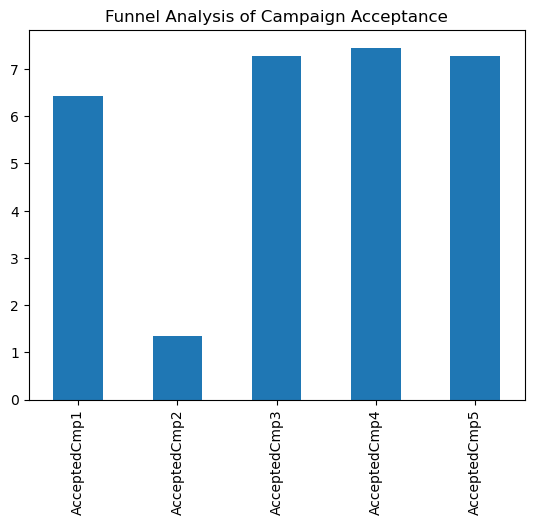

In [14]:
# Funnel Analysis
funnel = merged_df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].mean() * 100
funnel.plot(kind='bar', title='Funnel Analysis of Campaign Acceptance')
plt.show()


Correlation Matrix:
                 MntWines  MntMeatProducts  MntGoldProducts  MntFishProducts  \
MntWines         1.000000         0.562667         0.387516         0.399753   
MntMeatProducts  0.562667         1.000000         0.350609         0.568402   
MntGoldProducts  0.387516         0.350609         1.000000         0.422875   
MntFishProducts  0.399753         0.568402         0.422875         1.000000   
Income           0.576903         0.577805         0.321938         0.437564   

                   Income  
MntWines         0.576903  
MntMeatProducts  0.577805  
MntGoldProducts  0.321938  
MntFishProducts  0.437564  
Income           1.000000  


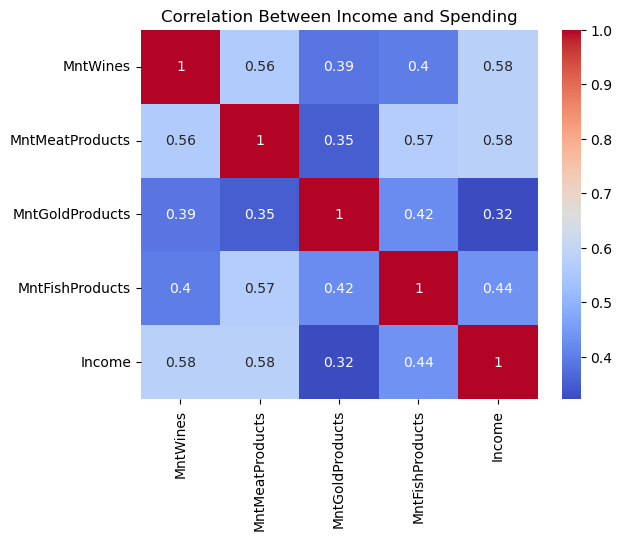

In [15]:
# Income Impact on Spending
if 'Income' in merged_df.columns:
    spending_cols.append('Income')
    correlations = merged_df[spending_cols].corr()
    print("\nCorrelation Matrix:")
    print(correlations)
    sns.heatmap(correlations, annot=True, cmap='coolwarm')
    plt.title('Correlation Between Income and Spending')
    plt.show()

In [34]:
# Complaints vs Recency
t_stat, p_value = ttest_ind(
    merged_df[merged_df['Complain'] == 0]['Recency'], 
    merged_df[merged_df['Complain'] == 1]['Recency']
)
print(f"T-test for Complaints vs Recency: p-value = {p_value}")


T-test for Complaints vs Recency: p-value = 0.5313892035771043


In [36]:
# Campaign Acceptance Overlap
campaign_corr = merged_df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].corr()
print("\nCampaign Acceptance Correlation:")
print(campaign_corr)
for cmp in ['AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    contingency_table = pd.crosstab(merged_df['AcceptedCmp1'], merged_df[cmp])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-Square Test between AcceptedCmp1 and {cmp}: p-value = {p}")


Campaign Acceptance Correlation:
              AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
AcceptedCmp1      1.000000      0.175315      0.094751      0.251300   
AcceptedCmp2      0.175315      1.000000      0.072020      0.292210   
AcceptedCmp3      0.094751      0.072020      1.000000     -0.079512   
AcceptedCmp4      0.251300      0.292210     -0.079512      1.000000   
AcceptedCmp5      0.403078      0.221533      0.080316      0.306526   

              AcceptedCmp5  
AcceptedCmp1      0.403078  
AcceptedCmp2      0.221533  
AcceptedCmp3      0.080316  
AcceptedCmp4      0.306526  
AcceptedCmp5      1.000000  
Chi-Square Test between AcceptedCmp1 and AcceptedCmp2: p-value = 2.3244718917083305e-15
Chi-Square Test between AcceptedCmp1 and AcceptedCmp3: p-value = 1.570309546143732e-05
Chi-Square Test between AcceptedCmp1 and AcceptedCmp4: p-value = 8.977896697656528e-32
Chi-Square Test between AcceptedCmp1 and AcceptedCmp5: p-value = 9.20742161582492e-80
